In [2]:
import sys
sys.path.append(r'../')

from hao.Instruction_ViT import Instruction_ViT
from data.data_ISIC import ISICDataModule
import hao.utils as u
from hao.CLIP import CLIP

In [3]:
img_size, patch_size, batch_size = 224, 16, 256
num_workers = 4
max_epochs = 30
use_bias = False
restart_train = False
gpu_idx = 0
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 512, 1024, 8, 4
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.0001
last_model_path = r'Instruction_pth/last_model.pth'
best_model_path = r'Instruction_pth/best_model.pth'
image_dir=r"C:\Users\HaoXL\Music\ISIC\2018\Training_Data\ISIC2018_Task3_Training_Input"
label_file=r"C:\Users\HaoXL\Music\ISIC\2018\Training Ground Truth\ISIC2018_Task3_Training_GroundTruth\ISIC2018_Task3_Training_GroundTruth.csv"
# categories = [
#     'Melanoma (MEL)',
#     'Melanocytic Nevus (NV)',
#     'Basal Cell Carcinoma (BCC)',
#     'Actinic Keratoses and Intraepithelial Carcinoma(AKIEC)', 
#     'Benign Keratosis (BKL)',
#     'Dermatofibroma (DF)',
#     'Vascular Lesions (VASC)'
# ]
categories = [
    'Melanoma',
    'Melanocytic Nevus',
    'Basal Cell Carcinoma',
    'Actinic Keratoses and Intraepithelial Carcinoma', 
    'Benign Keratosis',
    'Dermatofibroma',
    'Vascular Lesions'
]
texts = [f'a photo of skin lesions of {c}' for c in categories]
num_classes = len(categories)
# device = "cuda" if torch.cuda.is_available() else "cpu"


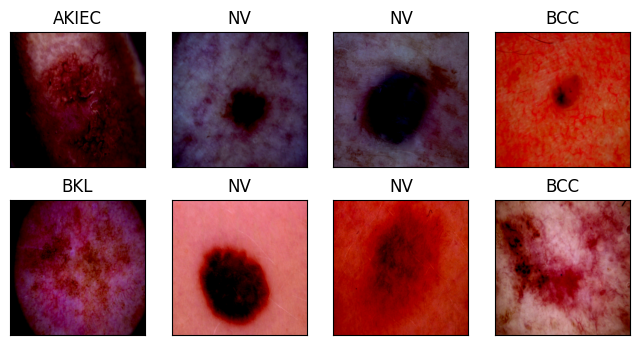

In [4]:
data = ISICDataModule(image_dir, label_file, batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

In [5]:
model = Instruction_ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, texts, lr, use_bias, num_classes)
trainer = u.Trainer(max_epochs, last_model_path, best_model_path, restart_train, gpu_idx)
trainer.fit(model, data)

In [6]:
trainer.print_training_his(max_epochs)

Epoch 1 : train loss 1.3316 val loss 1.2680 val acc 67.68%
Epoch 2 : train loss 1.2369 val loss 1.2039 val acc 68.40%
Epoch 3 : train loss 1.2001 val loss 1.1848 val acc 68.44%
Epoch 4 : train loss 1.1845 val loss 1.1778 val acc 67.87%
Epoch 5 : train loss 1.1775 val loss 1.1641 val acc 69.40%
Epoch 6 : train loss 1.1611 val loss 1.1524 val acc 69.64%
Epoch 7 : train loss 1.1509 val loss 1.1358 val acc 70.80%
Epoch 8 : train loss 1.1297 val loss 1.1222 val acc 71.68%
Epoch 9 : train loss 1.1156 val loss 1.1096 val acc 73.15%
Epoch 10: train loss 1.0996 val loss 1.1021 val acc 73.66%
Epoch 11: train loss 1.0886 val loss 1.0959 val acc 74.33%
Epoch 12: train loss 1.0801 val loss 1.0876 val acc 75.06%
Epoch 13: train loss 1.0745 val loss 1.0750 val acc 75.74%
Epoch 14: train loss 1.0626 val loss 1.0776 val acc 75.48%
Epoch 15: train loss 1.0568 val loss 1.0731 val acc 75.91%
Epoch 16: train loss 1.0486 val loss 1.0912 val acc 75.25%
Epoch 17: train loss 1.0447 val loss 1.0759 val acc 75.6